<a href="https://colab.research.google.com/github/01DaisyLynn/Financial-dataset-statistics/blob/main/WK2_Statistics_Independent_Project_2021_12_Daisy_Lynn_Wanjiru_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXPLORATORY DATA ANALYSIS

Defining the Question

a) Specifying the question

*predict which individuals are most likely to have or use a bank account*

b) Metric of success

*check dataset, identify and deal with outliers/anomalies/duplicates/null values*

c) Context

***Importing Libraries***

In [ ]:
# Importing the pandas library
import pandas as pd 

# Importing the numpy library
import numpy as np 

# Importing Seaborn
import seaborn as sns

# Importing Matplotlib
import matplotlib.pyplot as plt

***Reading dataset***

In [ ]:
dataset_df = pd.read_csv("Financial Dataset.csv", encoding='utf-8', delimiter=',')
dataset_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


***Checking the data***

In [ ]:
#Checking shape of dataset
dataset_df.shape

(23524, 13)

In [ ]:
#getting info about our set
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
#describing the data set
dataset_df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [ ]:
#get the null values
dataset_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
#finding duplicates
dataset_df.duplicated(keep=False)

0        False
1        False
2        False
3        False
4        False
         ...  
23519    False
23520    False
23521    False
23522    False
23523    False
Length: 23524, dtype: bool

In [ ]:
#getting the unique values from each of our columns
dataset_df.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

***Tidying dataset***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


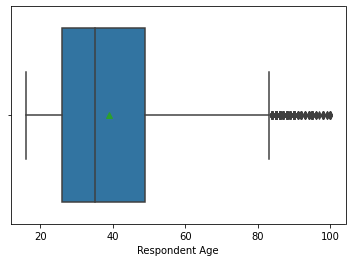

In [ ]:
#checking for outliers
#in respondent age column
sns.boxplot(dataset_df['Respondent Age'],showmeans=True)       
#will not drop outliers since they're crucial for the results/ might affect results

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


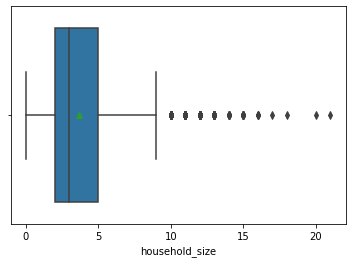

In [ ]:
#checking for outliers
# in household_size column
sns.boxplot(dataset_df['household_size'],showmeans=True)

In [ ]:
# Checking for Anomalies
#these are points that differ from the rest of the data
q1_1 = dataset_df['household_size'].quantile(.25)
q3_1 = dataset_df['household_size'].quantile(.75)

iqr_1 = q3_1 - q1_1

q1_2 = dataset_df['Respondent Age'].quantile(.25)
q3_2 = dataset_df['Respondent Age'].quantile(.75)

iqr_2 = q3_2 - q1_2

print(iqr_1)
print(iqr_2)

3.0
23.0


In [ ]:
#filling the null value

missing_value=0.0
dataset_df['household_size'].fillna(missing_value,inplace=True)
dataset_df['Respondent Age'].fillna(missing_value,inplace=True)
dataset_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


**Univariate Analysis**

A) Numerical variables

*i) Measure of central Tendancy*

In [ ]:
#finding mode of respondant age 
dataset_df["Respondent Age"].mode()

0    30.0
dtype: float64

In [ ]:
#mean of respondant age 
dataset_df["Respondent Age"].mean()

38.804299702000854

In [ ]:
#mean of household size
dataset_df['household_size'].mean()

3.6818181818181817

*ii) Measure of dispersion*

In [ ]:
#Finding the range of Respondent Age
#variation between the highest and lowest values in householdsize set

max = dataset_df['Respondent Age'].max()
min = dataset_df['Respondent Age'].min()

Range = max-min
print(Range)

84.0


In [ ]:
#Variance of Respondent Age column
#this how far data points are spread from the mean

dataset_df["Respondent Age"].var()

272.9102714347262

In [ ]:
#Finding standard deviation in Respondent Age column, this is the square root of variance

dataset_df["Respondent Age"].std()    
#our mean is 38.80 meaning our values are  further from the mean, this means our data points are widely spread

16.51999610879876

In [ ]:
#finding quantiles of Respondent Age set
#q1=0.25, q2=0.5, q3=0.75

dataset_df["Respondent Age"].quantile([0.25,0.5,0.75])
#0.25 shows the median of the values in the lower half
#0.5 shows median of the whole set
#0.75 shows the median of the values in the upper half

0.25    26.0
0.50    35.0
0.75    49.0
Name: Respondent Age, dtype: float64

In [ ]:
#Determining skewness
dataset_df["Respondent Age"].skew()

#positively skewed, because the resulting number is in its positive form
#this means the mean is greater than the mode
#0.8 means its moderately symmetrical

0.8418012375387167

In [ ]:
#determining kurtosis
dataset_df["Respondent Age"].kurt()

#our set is mesokurtic because our result is close to 0 which is the normal distribution
#this means the presence of outliers is close to 0

0.10110811880734305

In [ ]:
#describing a summary of household size set
dataset_df['Respondent Age'].describe()

count    23490.000000
mean        38.804300
std         16.519996
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: Respondent Age, dtype: float64

B) Categorical Variables

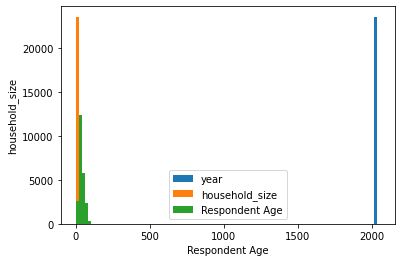

In [ ]:
#A histogram of numerical variables
ax = dataset_df.plot(kind='hist', bins=100)
ax.set_xlabel('Respondent Age', fontsize=10)
ax.set_ylabel('household_size', fontsize=10)

plt.show()

In [113]:
#determining frequency of the various countries in dataset

dataset_df.country.value_counts()

Rwanda      8735
Tanzania    6606
Kenya       6068
Uganda      2101
Name: country, dtype: int64

Bivariate analysis

Numerical and Numerical

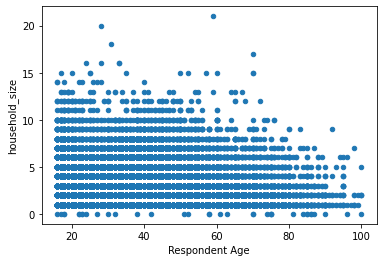

In [ ]:
#scatterplot

dataset_df.plot(x='Respondent Age', y='household_size', kind='scatter')
plt.show()

Categorical & Categorical

In [114]:
#stack bar
#dataset_df[['Respondent Age', 'household_size']].plot(kind='bar', figsize=(8, 6), stacked=True)

# Giving our chart a title
#plt.title("Factors", fontsize=14)

# Labeling our y axis
#plt.ylabel("Respondent Age", fontsize=14)

# Labeling our x axis
#plt.xlabel("year", fontsize=14)

#plt.show()

Categorical and Numerical

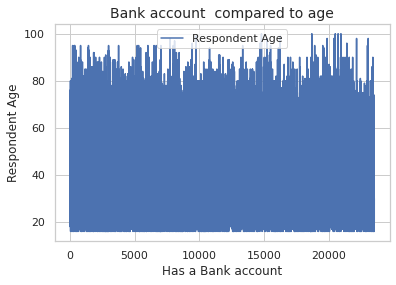

In [106]:
#line graph
dataset_df[["Respondent Age"]].plot(kind='line')

# Giving a title to our line graph
plt.title("Bank account compared to age", fontsize=14)

# Labelling the y-axis
plt.ylabel('Respondent Age')

# Labelling the x-axis
plt.xlabel('Has a Bank account')

# Displaying our graph
plt.show()

**Multivariate Analysis**

*Principal component analysis*

In [ ]:
#preproccessing
X = dataset_df.drop('country', 1)
y = dataset_df['country']
print(y)

0         Kenya
1         Kenya
2         Kenya
3         Kenya
4         Kenya
          ...  
23519    Uganda
23520    Uganda
23521    Uganda
23522    Uganda
23523    Uganda
Name: country, Length: 23524, dtype: category
Categories (4, object): ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']


In [ ]:
#splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train, X_test, y_train, y_test )

       year  ...                   Type of Job
22960  2018  ...                  Other Income
4523   2018  ...           Informally employed
437    2018  ...           Farming and Fishing
1657   2018  ...  Formally employed Government
5110   2018  ...           Informally employed
...     ...  ...                           ...
13123  2016  ...           Farming and Fishing
19648  2017  ...                 Self employed
9845   2016  ...           Informally employed
10799  2016  ...           Informally employed
2732   2018  ...           Informally employed

[18819 rows x 12 columns]        year       uniqueid  ...  Level of Educuation                 Type of Job
4857   2018  uniqueid_4858  ...    Primary education        Remittance Dependent
22131  2018   uniqueid_709  ...    Primary education  Dont Know/Refuse to answer
22675  2018  uniqueid_1253  ...  No formal education               Self employed
5165   2018  uniqueid_5166  ...  No formal education         Farming and Fishing
1620

In [ ]:
#normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_train)

In [ ]:
#WExplaining variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

In [ ]:
#train algorithmn with 1 principal comment
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_test)

In [ ]:
#training and predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

In [ ]:
#Performance evalution
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


In [ ]:
#train algorithmn with 2 principal comment
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_test)